### WORKSHOP - 5: License Plate Detection using OpenCV and Haar Cascade Classifier
## Name: Farhana H
## reg.no:212223230057

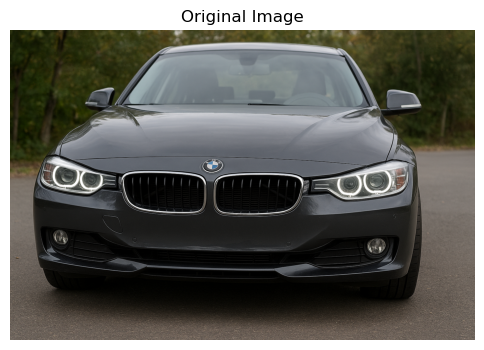

In [19]:
# -----------------------------------------------------------
# 1. READ INPUT IMAGE AND DISPLAY IT
# -----------------------------------------------------------

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('car.png')          # Replace with your image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


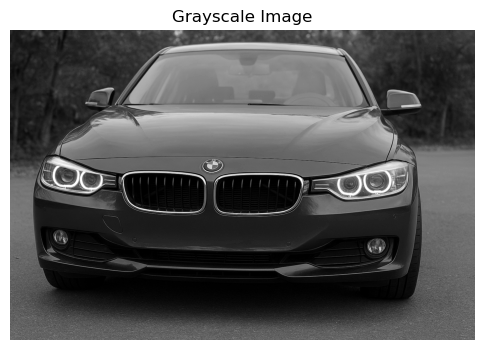

In [9]:
# -----------------------------------------------------------
# 2. CONVERT TO GRAYSCALE
# -----------------------------------------------------------

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,5))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


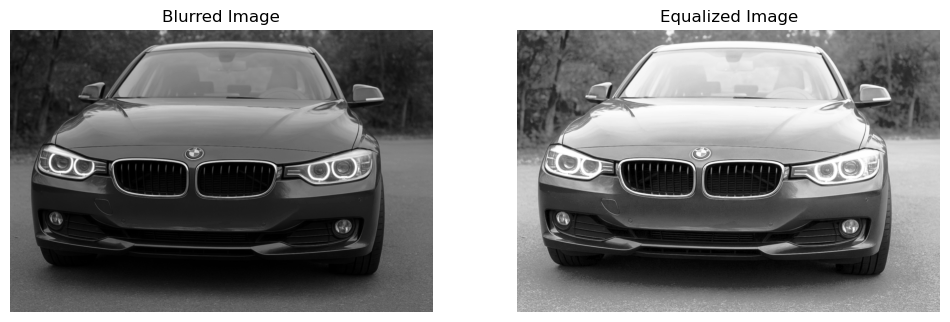

In [10]:
# -----------------------------------------------------------
# 3. PREPROCESSING (IMPROVEMENT STEP)
# -----------------------------------------------------------

blur = cv2.GaussianBlur(gray, (5,5), 0)
equalized = cv2.equalizeHist(blur)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(blur, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")

plt.show()


In [15]:
# -----------------------------------------------------------
# 4. LOAD HAAR CASCADE CLASSIFIER
# -----------------------------------------------------------

cascade_path = r"C:\Users\admin\Downloads\haarcascade_russian_plate_number.xml"
plate_cascade = cv2.CascadeClassifier(cascade_path)


In [16]:
# -----------------------------------------------------------
# 5. DETECT LICENSE PLATES
# -----------------------------------------------------------

plates = plate_cascade.detectMultiScale(
            equalized,
            scaleFactor=1.05,
            minNeighbors=4,
            minSize=(30, 30)
        )

print("Number of plates detected:", len(plates))


Number of plates detected: 0


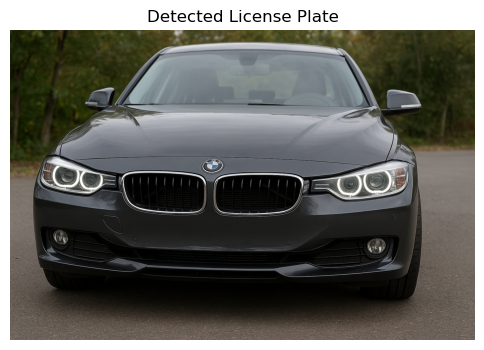

In [17]:
# -----------------------------------------------------------
# 6. DRAW BOUNDING BOXES AROUND PLATES
# -----------------------------------------------------------

detected_img = img_rgb.copy()

for (x, y, w, h) in plates:
    cv2.rectangle(detected_img, (x, y), (x+w, y+h), (0,255,0), 3)

plt.figure(figsize=(6,5))
plt.imshow(detected_img)
plt.title("Detected License Plate")
plt.axis("off")
plt.show()


In [18]:
# -----------------------------------------------------------
# 7. CROP AND SAVE DETECTED LICENSE PLATE
# -----------------------------------------------------------

crop_count = 0

for (x, y, w, h) in plates:
    plate_roi = img[y:y+h, x:x+w]      # Crop from original BGR image
    save_name = f"plate_crop_{crop_count}.jpg"
    cv2.imwrite(save_name, plate_roi)
    crop_count += 1

print("Saved Cropped Plates:", crop_count)


Saved Cropped Plates: 0
